In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc 
rc('font',family='AppleGothic')

In [3]:
# 예제 데이터 생성
raw_data = {'width': [7.1,7.9,7.4,8.2,7.6,7.8,7.0,7.1,6.8,6.6,7.3,7.2], 
            'height': [7.3,7.5,7.0,7.3,6.9,8.0,7.5,7.9,8.0,7.7,8.2,7.9], 
            'type': ['Apple','Apple','Apple','Apple','Apple','Apple','Pear','Pear','Pear','Pear','Pear','Pear']}

data = pd.DataFrame(raw_data)

In [4]:
data

,width,height,type
0,7.1,7.3,Apple
1,7.9,7.5,Apple
2,7.4,7.0,Apple
3,8.2,7.3,Apple
4,7.6,6.9,Apple
5,7.8,8.0,Apple
6,7.0,7.5,Pear
7,7.1,7.9,Pear
8,6.8,8.0,Pear
9,6.6,7.7,Pear


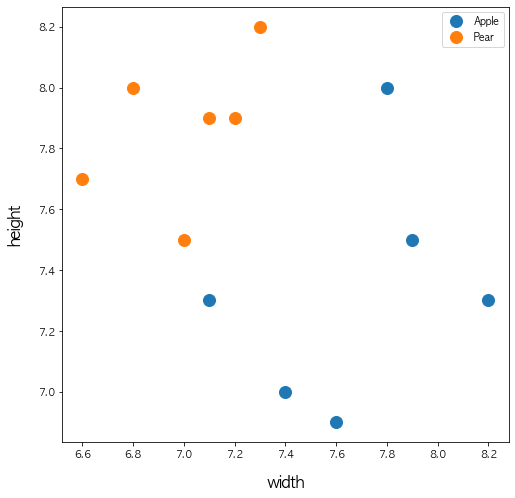

In [5]:
groups = data.groupby('type')
fig, ax = plt.subplots(figsize=(8,8))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.width, group.height, marker='o', linestyle='', ms=12)
ax.legend(['Apple', 'Pear'])
plt.xlabel('width', size = 16, labelpad=15)
plt.ylabel('height', size = 16, labelpad=15)
plt.show()

- 위의 산점도에서 사과(파란점)과 배(주황점)를 가장 잘 나눌 수 있는 선을 찾아보자.

In [6]:
data.sort_values(by=['width'], axis=0)

,width,height,type
9,6.6,7.7,Pear
8,6.8,8.0,Pear
6,7.0,7.5,Pear
0,7.1,7.3,Apple
7,7.1,7.9,Pear
11,7.2,7.9,Pear
10,7.3,8.2,Pear
2,7.4,7.0,Apple
4,7.6,6.9,Apple
5,7.8,8.0,Apple


- 7.3과 7.4의 평균 7.35

In [7]:
data.sort_values(by=['height'], axis=0)

,width,height,type
4,7.6,6.9,Apple
2,7.4,7.0,Apple
0,7.1,7.3,Apple
3,8.2,7.3,Apple
1,7.9,7.5,Apple
6,7.0,7.5,Pear
9,6.6,7.7,Pear
7,7.1,7.9,Pear
11,7.2,7.9,Pear
5,7.8,8.0,Apple


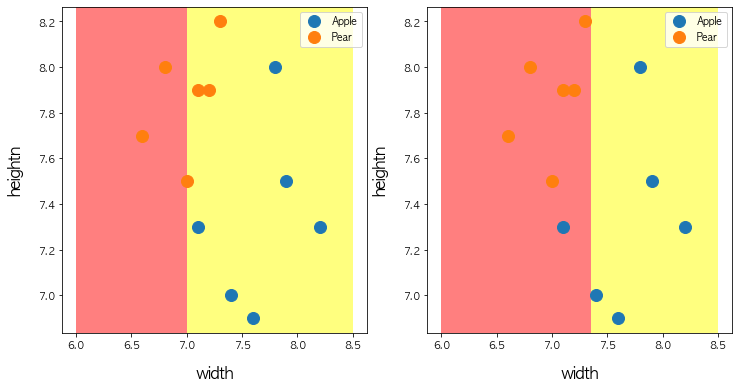

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.margins(0.05)
for name, group in groups:
    ax1.plot(group.width, group.height, marker='o', linestyle='', ms=12)
ax1.legend(['Apple', 'Pear'])
ax1.axvspan(6, 7.0, facecolor='red', alpha=0.5)
ax1.axvspan(7.0, 8.5, facecolor='yellow', alpha=0.5)
ax1.set_xlabel('width', size = 16, labelpad=15)
ax1.set_ylabel('heightn', size = 16, labelpad=15)

ax2.margins(0.05)
for name, group in groups:
    ax2.plot(group.width, group.height, marker='o', linestyle='', ms=12)
ax2.legend(['Apple', 'Pear'])
ax2.axvspan(6, 7.35, facecolor='red', alpha=0.5)
ax2.axvspan(7.35, 8.5, facecolor='yellow', alpha=0.5)
ax2.set_xlabel('width', size = 16, labelpad=15)
ax2.set_ylabel('heightn', size = 16, labelpad=15)

plt.show()

- 직관적으로 위의 두 그림에서 오른쪽 그림이 잘 나뉘어진것으로 보일것이다. 하지만 우리는 "잘" 나누었다는 정확한 기준을 가져야한다. 오른쪽 그림이 잘 나뉘었다고 말할 수 있는 기준으로 결정 트리에서는 **'지니 계수' (gini index)** 를 사용한다. 지니 계수를 계산하는 방법은 다음과 같다. n개의 범주가 있는 한 영역에서의 지니 계수는 다음과 같이 계산된다.

$$
\begin{equation} 
gini \ index = 1 - \sum_{i=1}^{n}p_{i}^2
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

- 여기서 $p_i$는 전체에서 $i$번째 범주가 차지하는 비중이다. 예를들어, 나누기 전 원래 상태 산점도에서의 지니 계수는 아래와 같이 계산된다.

$$
\begin{equation} 
gini \ index = 1 - \frac{6}{12}^2 - \frac{6}{12}^2 = 0.5
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

- 이를 영역을 나눠놓은 두 그림에 적용하는 경우에는 영역별로 전체에서 차지하는 비중을 가중해 계산하게된다. 결과는 아래와 같다.

$$
\begin{equation} 
gini \ index \ (left) = \frac{2}{12}\times\left(1 - \frac{0}{2}^2 - \frac{2}{2}^2\right) + \frac{10}{12}\times\left(1 - \frac{6}{10}^2 - \frac{4}{10}^2\right) = \frac{2}{12}\times0 + \frac{10}{12}\times\frac{48}{100} = 0.4
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$
$$
\begin{equation} 
gini \ index \ (right) = \frac{7}{12}\times\left(1 - \frac{1}{7}^2 - \frac{6}{7}^2\right) + \frac{5}{12}\times\left(1 - \frac{5}{5}^2 - \frac{0}{5}^2\right) = \frac{7}{12}\times\frac{12}{49} + \frac{5}{12}\times0 = 0.143
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

- 영역을 구분짓는 행위 자체가 두 범주를 나눌 수 있는 정보를 주었다고 하여 '정보 획득' (information gain)이라고 하는데, 각각의 정보 획득은 아래와 같다.

$$
\begin{equation} 
information \ gain (left) = 0.5 - 0.4 = 0.1
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$

$$
\begin{equation} 
information \ gain (right) = 0.5 - 0.143 = 0.357
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\end{equation}
$$


- 즉 오른쪽 그림이 더 많은 정보를 준다고 볼 수 있다. 이러한 방법으로 정보 이득이 최대가 되도록 데이터를 나누게 되면 결정 트리는 다음과 같은 모습을 나타낸다.

### wine 데이터셋
#### [데이터 설명]
- 데이터 링크(출처) : http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality
- winequality-red.csv / winequality-white.csv 두 파일을 다운로드
- 관측치 개수: 6497개
- 변수 개수: 독립변수 11개 / 종속변수 1개

#### 변수
- fixed acidity : 고정산
- volatile acidity : 휘발산
- critric acid : 구연산
- residual sugar : 잔당
- chlorides : 염화물
- free sulfur dioxide : 유리 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH
- sulphates : 황산염
- alcohol : 알코올
- quality : 등급

In [14]:
red_df = pd.read_csv('/Users/zoe/Downloads/winequality-red.csv', sep = ';', header = 0, engine = 'python')
white_df = pd.read_csv('/Users/zoe/Downloads/winequality-white.csv', sep = ';', header = 0, engine = 'python')

In [15]:
# 각 데이터에 레드/화이트 와인을 구별할 수 있는 type 변수 추가
red_df['class'] = 0
white_df['class'] = 1

In [16]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [17]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [18]:
wine = pd.concat([red_df, white_df])
wine.shape

(6497, 13)

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [20]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [21]:
## 변수 공간 제거 (빈공간 '_' (under score)로 변경)
wine.columns = wine.columns.str.replace(' ', '_')
wine.columns # 변경된 변수명 확인

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [22]:
# 독립변수와 종속변수 분리
X = wine[['alcohol', 'residual_sugar', 'pH']]
Y = pd.DataFrame(wine['class'])

In [23]:
import statsmodels.api as sm

In [24]:
# intercept 추가
X = sm.add_constant(X, has_constant='add')

In [25]:
X.head()

,const,alcohol,residual_sugar,pH
0,1.0,9.4,1.9,3.51
1,1.0,9.8,2.6,3.20
2,1.0,9.8,2.3,3.26
3,1.0,9.8,1.9,3.16
4,1.0,9.4,1.9,3.51


In [26]:
X.shape

(6497, 4)

In [27]:
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [28]:
Y.tail()

,class
4893,1
4894,1
4895,1
4896,1
4897,1


In [29]:
Y.shape

(6497, 1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4547, 4) (1950, 4) (4547, 1) (1950, 1)


In [32]:
print(np.sum(Y==1)/len(Y))

class    0.753886
dtype: float64


In [33]:
print(np.sum(Y_train==1)/len(Y_train))

class    0.753904
dtype: float64


In [34]:
print(np.sum(Y_test==1)/len(Y_test))

class    0.753846
dtype: float64


In [35]:
X_train_dt = X_train.drop(['const'], axis = 1)
X_test_dt = X_test.drop(['const'], axis = 1)

In [36]:
X_train_dt.head()

,alcohol,residual_sugar,pH
484,9.6,6.6,3.29
3578,11.2,1.2,3.10
2705,9.4,6.4,3.19
3968,9.5,7.9,3.16
3050,9.6,1.7,3.53


In [37]:
X_test_dt.head()

,alcohol,residual_sugar,pH
3156,9.5,15.1,2.87
1166,10.2,2.0,2.94
2035,10.4,1.1,2.97
3500,13.0,15.5,3.19
3755,11.0,7.4,2.99


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1234)
dt.fit(X_train_dt, Y_train)
# 정확도 출력
print(dt.score(X_train_dt, Y_train))
print(dt.score(X_test_dt, Y_test))

0.9973608972949197
0.8661538461538462


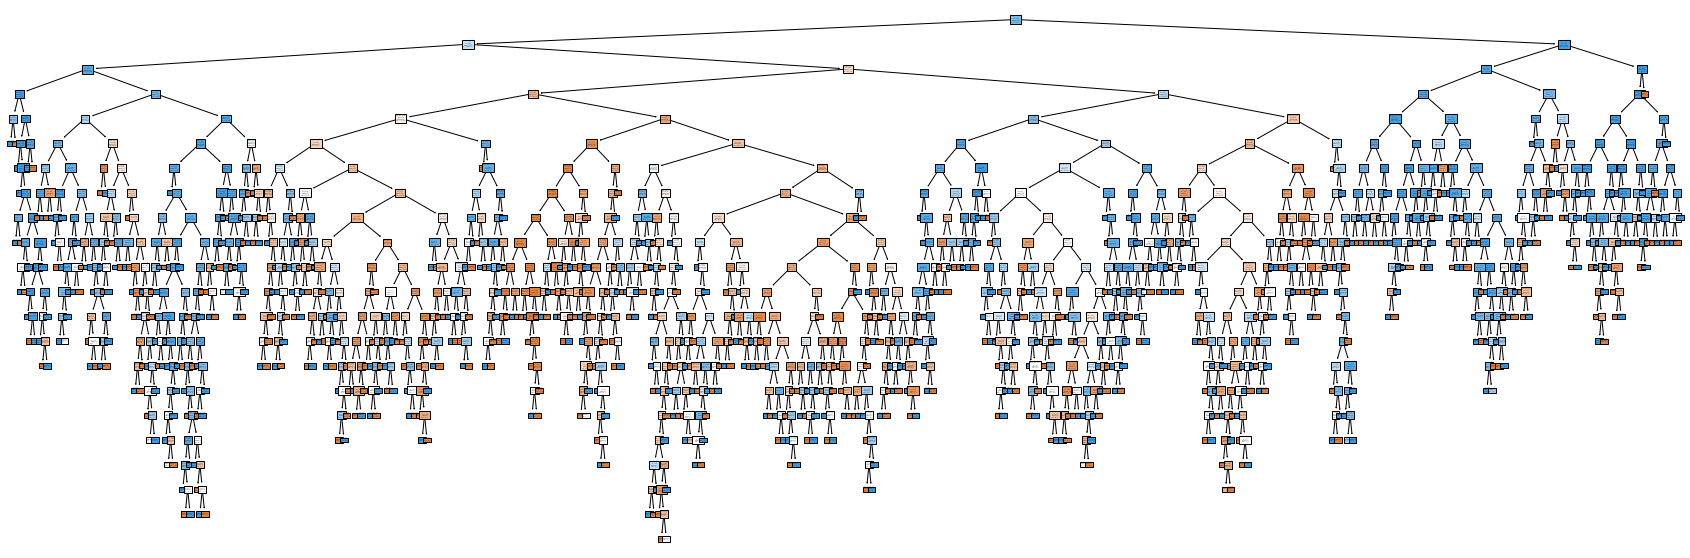

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 10))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'residual_sugar', 'pH'])
plt.show()

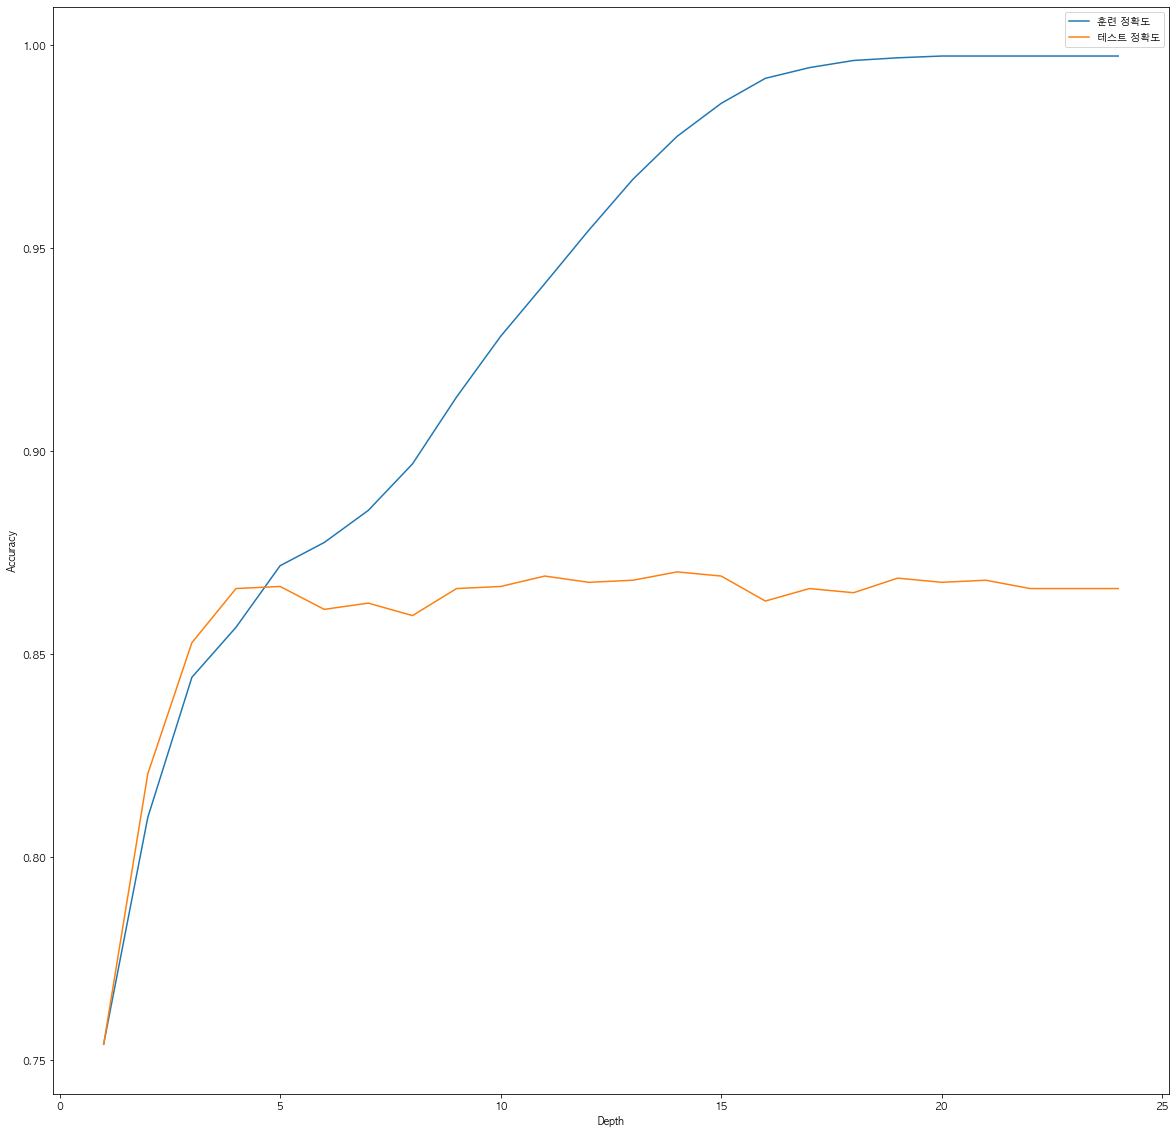

In [40]:
training_accuracy = []
test_accuracy = []

max_depth_settings = range(1, 25)

for k in max_depth_settings:
    # 모델 생성
    dt = DecisionTreeClassifier(max_depth = k, random_state = 1234)
    dt.fit(X_train_dt, Y_train)
    # 정확도 출력
    training_accuracy.append(dt.score(X_train_dt, Y_train))
    test_accuracy.append(dt.score(X_test_dt, Y_test))

# 깊이 증가에 따른 예측정확도 성능 비교
plt.figure(figsize=(20,20))
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

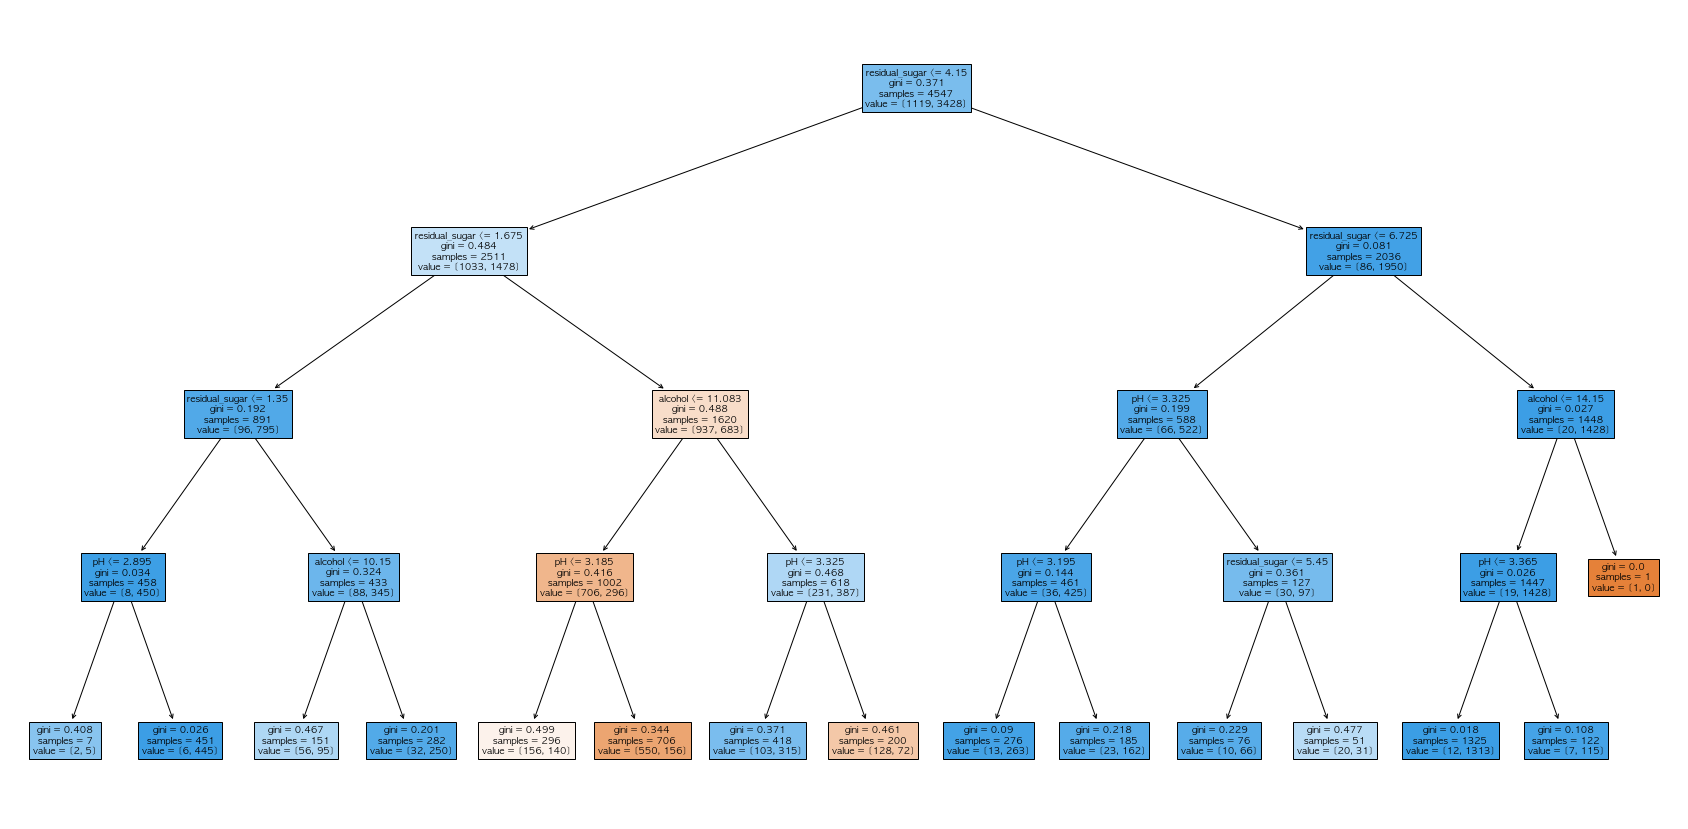

In [41]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
dt.fit(X_train_dt, Y_train)
plt.figure(figsize = (30, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'residual_sugar', 'pH'])
plt.show()